## Problem 1

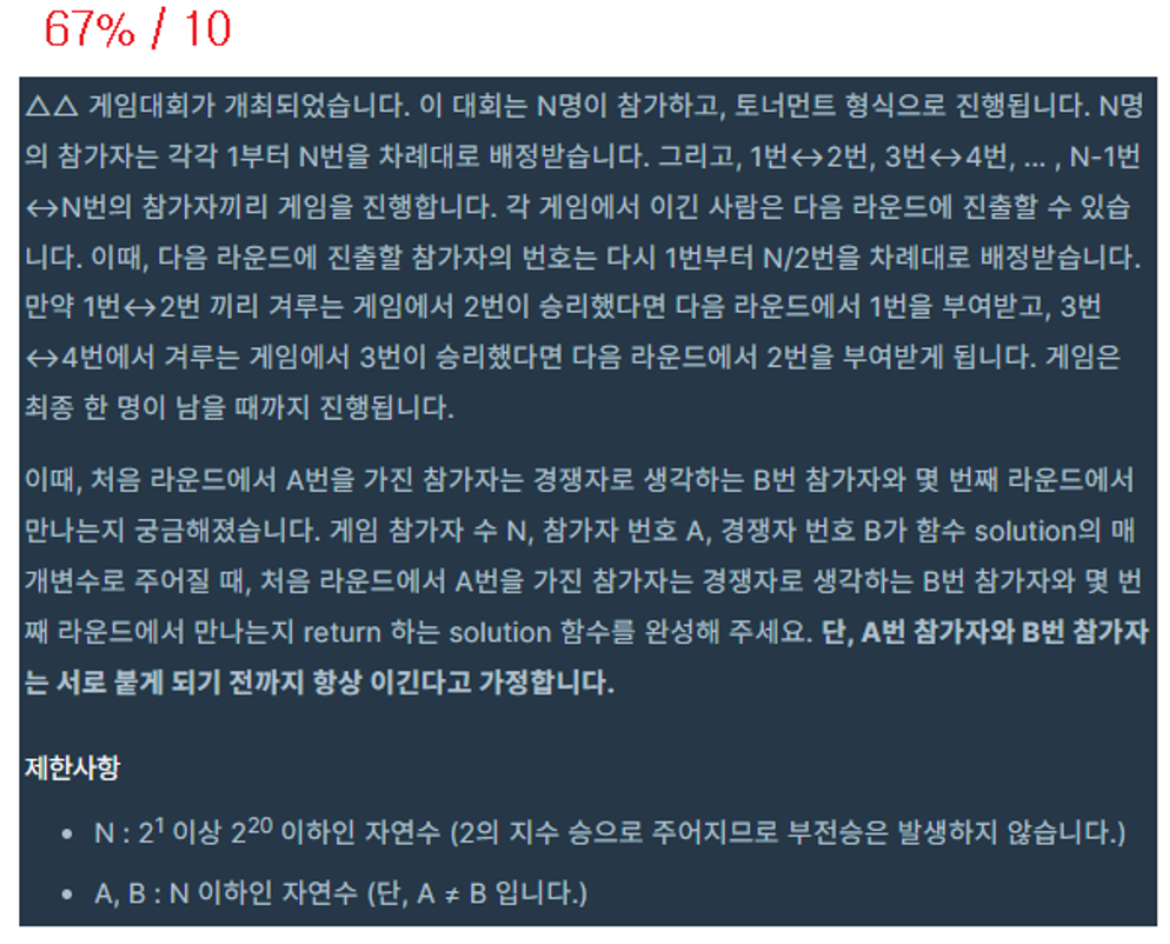

In [2]:
'''

1...N 번의 번호를 할당

1 라운드 : 1<->2, 3<->4, 5<->6, ... , N-1 <-> N

1...N/2 번의 번호를 할당

2라운드 : (N-1) / 2 <-> N/2
3라운드 : (N-1) / 4 <-> N/4
4라운드 : (N-1) / 8 <-> N/8

.
.
.

1...N/2^(x-1) 번의 번호를 할당

x라운드 : (N-1) / 2^(x-1) <-> N/2^(x-1)

만약 a = 1, b = 10, n = 16
1라운드 : 1 <-> 2, 3 <-> 4, 5 <-> 6, 7 <-> 8, 9 <-> 10, 11 <-> 12, 13 <-> 14, 15 <-> 16  #16
2라운드 : 1 <-> 3, 5 <-> 7, 10 <-> 11, 14 <-> 16      #8
3라운드 : 1 <-> 5, 10 <-> 16                          #4
4라운드 : 1 <-> 10                                    #2

4라운드에서 만난다.

A와 B는 몇번째 라운드에서 만나는지 return하는 solution 함수를 완성하라.
단, A번 참가자와 B번 참가자는 서로 붙게 되기 전까지 항상 이긴다고 가정하자.


'''
# My answer

def solution(n, a, b):
    round = 0
    while True:
      j = n / 2
      round +=1
      if j == 2:
        return False
    return round

solution(16, 1, 10)

KeyboardInterrupt: 

In [4]:
def solution(n,a,b):            # n 참가자의 수, a, b는 참가자의 번호 (1부터 시작)
    a -= 1                      # 참가자의 번호는 1부터 시작하기 때문에 배열 인덱스처럼 0부터 시작하도록 1을 빼준다.
    b -= 1                      # 참가자의 번호는 1부터 시작하기 때문에 배열 인덱스처럼 0부터 시작하도록 1을 빼준다.
    answer = 1                  # 1라운드부터 시작하기때문에 초기화 시켜준다.

    while True:                 # 무한반복 시작
        a //= 2                 # 각 참가자의 번호를 2로 나눠서 "다음 라운드의 위치를 계산"
        b //= 2                 # 각 참가자의 번호를 2로 나눠서 "다음 라운드의 위치를 계산"
        if a == b:              # a 와 b가 같은 번호라는 뜻은 둘이 대결한다는 뜻
            return answer       # 그때의 라운드 번호를 반환
        answer += 1             # 만약 a와 b가 다른 번호라면 다음 라운드로 넘어간다는 뜻이므로 answer를 +1 증가

solution(16, 1, 10)

4

## Problem 2

https://school.programmers.co.kr/learn/courses/30/lessons/77486

In [3]:
"""
이 함수는 다단계 조직에서 판매 실적에 따라 돈이 어떻게 분배되는지를 계산해줘. 여기서:

enroll: 조직에 가입한 사람들의 이름 리스트 (예: ["john", "mary", "edward"]).
referral: 각 사람을 추천한 상위 사람의 이름 리스트 (예: ["-", "john", "mary"]).
seller: 물건을 판 사람들의 이름 리스트 (예: ["edward", "john"]).
amount: 각 사람이 판 물건의 양 리스트 (예: [10, 5]).
목표는 각 사람이 최종적으로 얼마나 돈을 받는지 계산해서 money 리스트로 반환하는 거야. 돈은 판매 실적의 90%가 자신에게, 10%가 추천인(상위 사람)에게 가는 방식으로 분배돼.
"""


def solution(enroll, referral, seller, amount):
    money = [0 for _ in range(len(enroll))]           # 각 사람이 버는 돈을 저장할 리스트 len(enroll)만큼 크기를 만들고 0으로 초기화
    dict = {}                                         # 사람 이름과 그 사람의 인덱스를 연결하는 딕셔너리
    for i, e in enumerate(enroll):                    # 예: enroll = ["john", "mary", "edward"]라면:
        dict[e] = i                                   # dict = {"john": 0, "mary": 1, "edward": 2}.
    for s, a in zip(seller, amount):                  # seller와 amount를 쌍으로 묶어서 반복
        m = a * 100                                   # m: 판매금액, 물건 하나당 100원

        # 돈을 분배하는 과정
        # s != "-": 현재 사람이 최상위(추천인이 없는 경우, "-")가 아니어야 함.
        # m > 0: 분배할 돈이 남아 있어야 함.
        while s != "-" and m > 0:

            # idx = dict[s]: 현재 사람(s)의 인덱스를 딕셔너리에서 찾아
            idx = dict[s]

            # m//10: 10% (상위로 보낼 금액).
            # m - m//10: 90% (자신이 받을 금액).
            # 예: m = 1000이면, m//10 = 100, m - m//10 = 900.
            money[idx] += m - m//10

            # m //= 10: 남은 10%를 다음 상위 사람에게 보낼 준비
            # 예: m = 1000이었다면, 이제 m = 100.
            m //= 10

            # s = referral[idx]: 현재 사람의 추천인(상위 사람)으로 이동.
            s = referral[idx]

    # 모든 분배가 끝나면 각 사람이 받은 돈이 담긴 money 리스트를 반환.
    return money